In [ ]:
#This notebook grid searcher several wd to find best wd 
#for one cycle training (https://arxiv.org/pdf/1803.09820.pdf)

#using fastai library 

In [ ]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.vision import *

In [ ]:
path = untar_data(URLs.DOGS)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
learn = ConvLearner(data, models.tvm.resnet50, metrics=accuracy, ps=0.4, callback_fns=ShowGraph)

In [4]:
@dataclass  
class wd_finder:
    #learner
    #wd, can be a single value or a tuple
    # if no wd is passed it will use standartart wds 
    
    learn: Learner
    wd:Union[int,Callable]=None
    
    def __post_init__(self, **kwargs):
        self.wd_list = listify(self.wd)
        self.wd_recoreder = []
        
        if self.wd is None:
            self.wd_list = [0, 1e-1, 1e-3, 1e-5]
            
        for wd in self.wd_list:
            self.learn.lr_find(wd=self.wd, **kwargs)
            self.wd_recoreder.append(self.learn.recorder)
            
    def plot_wd(self, skip_start:int=10, skip_end:int=5)->None:
        _, ax = plt.subplots(1,1)
        
        for k, i in enumerate(self.wd_recoreder):
            losses = i.losses[skip_start:-skip_end] if skip_end > 0 else i.losses[skip_start:]
            lrs = i.lrs[skip_start:-skip_end] if skip_end > 0 else i.lrs[skip_start:]
            ax.plot(lrs, losses, label='WD={}'.format(self.wd_list[k]))
            ax.legend()
            ax.set_xscale('log')


            


# Out of box wd saerch

In [5]:
find_wd = wd_finder(learn)

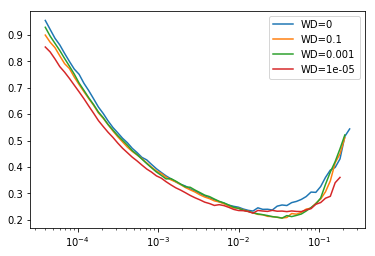

In [6]:
find_wd.plot_wd()

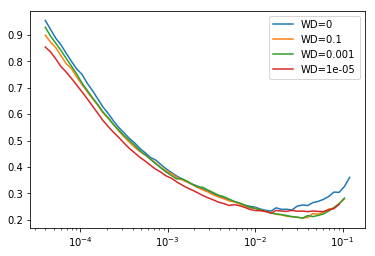

In [7]:
find_wd.plot_wd(skip_end=10)

# Custom wd grid

In [9]:
find_wd = wd_finder(learn, wd=(1e-5, 1e-6, 1e-7))

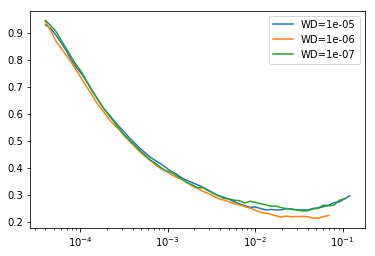

In [10]:
find_wd.plot_wd(skip_end=10)